<h1>Solving a Healthcare Problem for Improved Service Delivery</h1>

##Introduction:


> The State Health Ministry of washingtone  would like to upgrade staff or resources across the 5 existing facilities that are available  across the WA state.This is to allocate resources to where they are most needed, based on current and future demand for different types of services in different geographic regions/areas.


>So to solve this problem we need to first Understand the areas which are near to the Facilitiesand then group those areas.then we need to summerize the total area population and then determine demand for types of health services and also we need to Predict future demand for types of services in each area and nearby areas of the facilities..




## Assumptions & Approch:

>

1.   As given in the problem i'm assuming only five facilities are available A,B,C,D,E
2.   To group areas im making use of area zip codes and and then by the distance between area zipcode and the facility ZIp code
3.   So first im collecting all the zip codes in washingtone along with their lattitude and longitude
4.  Now for every zip code i will compute distance to all 5 facilities and i will put the area zipcode to the closest Facility bucket
5.  In order to compute the distances im making use of Latitude and longitude
6.  Now The question could be how close the distance should between area zipcode and Facility Zipcode
7.  One of the other Key assumption that i made is on Average a person can in washingtone can travel 40 miles per hour(assumed)
8.  So all the area Zipcodes which are 40 miles away from a Facility zipcode will form a group
9.  If area zipcode comes under two facilities we will take the closest Facility.
10.  All the zip codes which are very far will automatically not come into any Facility.
11.  Now coming to population i got the population by zipcode but i did not found the any data source that gave me meternity population,eldery population in those zipcode.
12.  On average at any given time the meternity population in the usa is some thing around 5-10% from herehttps://www.quora.com/How-many-women-are-pregnant-in-the-USA-at-any-given-time.
13.  So i randomly generated the percentage of maternity in each zip code as i could not find any dataset.
14.  I also generated the percentage of people who need elderly care by generating a number between 1 to 30
15.  For predicting futhuere  maternity and elderly rates i made an other assumption taht on average there is 0.7%  increase in every year .
16.   So we will try to predict the futhure that is 2011 maternity and elderly increase rates.




##Data Sources:




> There are five facilities named 1,2,3,4,5 with there corresponding primery secondary and teritory capacities

<!DOCTYPE html>
<html>
<head>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>
<table>
  <tr>
    <th>Facility ID </th>
    <th>Facility AreaZipcode</th>
    <th>Facility Capacity Primary</th>
    <th>Facility Capacity Secondary</th>
    <th>Facility Capacity Tertiary</th>
  </tr>
  <tr>
    <td>Facility 1</td>
    <td>98007</td>
    <td>200</td>
    <td>44200</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Facility 2</td>
    <td>98290</td>
    <td>36000</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Facility 3</td>
    <td>98065</td>
    <td>12000</td>
    <td>24366</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Facility 4</td>
    <td>98801</td>
    <td>0</td>
    <td>10150</td>
    <td>22100</td>
  </tr>
  <tr>
    <td>Facility 5</td>
    <td>98104i</td>
    <td>58000</td>
    <td>32700</td>
    <td>8050</td>
  </tr>
</table>

</body>
</html>


> As we assume that we compute the distance by knowing the Zip code Latitude and longitude we need to get the dataset with zip code and latitude and logitude information, and the source is [federalgovernmentzipcodes.us](https://)

>And the data for population by zip code can be uptained from splitwise.they are offering this publicly and free. this link https://blog.splitwise.com/2013/09/18/the-2010-us-census-population-by-zip-code-totally-free/

> These aare the four features that we need to start of

Feature | Description 
----------|---------------
**`Zipcode`** | zipcode is five numbers that are added to a postal address to assist the sorting of mail
**`population`** | This field contains the population by zipcode 
**`Latitude`** | Latitude is one of the angle that uniquely define points on a sphere.
**`Longitude`** | Longitude is another angle that uniquely define points on a sphere.

##Current population counts in each area:

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2,radians

In [0]:
#Loading our population data by zip code
Population_data_frame=pd.read_csv('2010+Census+Population+By+Zipcode+(ZCTA).csv',names=["Zipcode","population"])
Population_data_frame = Population_data_frame.iloc[1:]
Population_data_frame['Zipcode'] = Population_data_frame['Zipcode'].apply(int)
Population_data_frame['population'] = Population_data_frame['population'].apply(int)

In [0]:
#loading Latitude and longitude of Zipcodes
Zip_code_lat_long_data_frame=pd.read_csv('free-zipcode-database.csv',low_memory=False)
Zip_code_lat_long_data_frame.set_index("State", inplace=True)

In [294]:
#loading only Washington zipcodes
WA_zipcode_lat_long_data_frame=Zip_code_lat_long_data_frame.loc[['WA'],['Zipcode','Lat','Long']]
#data cleaning :droping duplicates
WA_zipcode_lat_long_data_frame=WA_zipcode_lat_long_data_frame.drop_duplicates()
#shape of the data frame
WA_zipcode_lat_long_data_frame.shape

(733, 3)

In [295]:
WA_zipcodes=WA_zipcode_lat_long_data_frame['Zipcode'].values.tolist()
#only fetching the washington area zip codes and their populations
WA_population_data_frame=Population_data_frame[Population_data_frame.Zipcode.isin(WA_zipcodes)]
#data cleaning :droping duplicates
WA_population_data_frame=WA_population_data_frame.drop_duplicates()
#shape of the data frame
WA_population_data_frame.shape

(600, 2)

In [0]:
#joining both the populations and latitude and longitude data usingpd.merge on zipcode(inner join)
Zipcode_pop_lat_long_df = pd.merge(WA_population_data_frame, WA_zipcode_lat_long_data_frame, how='inner', on = 'Zipcode')

One of our assumption is that we need randomly generate the maternity care population and elderly care population for doing this we will generate a random number between 1 to 10 for maternitycare population and a random number between 1 to30 for elderly care population. and fill them up and add to our data frame

In [0]:
#1)generate a random number between 1 to 10 
#2)take that percent of zip code population and then append it to the maternal population with in area
#3)repeat the above two steps for every Zipcodee

Maternity_Population_within_Area=[]
Maternity_Population_within_Area_percentage=[]
Predicted_future_additional_increase_decrease_maternity_population=[]
population=Zipcode_pop_lat_long_df['population'].values
for i in range(0,600):
  p=random.randint(1,10)
  f=random.randint(0,1)
  population_future=population[i]+((f*population[i])/100)
  present=(p*population[i])/100
  future=(p*population_future)/100
  rate=future-present
  Maternity_Population_within_Area.append(present)
  Maternity_Population_within_Area_percentage.append(p)
  Predicted_future_additional_increase_decrease_maternity_population.append(int(rate))

In [0]:
#1)generate a random number between 1 to 30 
#2)take that percent of zip code population and then append it to the elderly population with in area 
#3)repeat the above two steps for every Zipcodee 

Elderly_Population_within_Area=[]
Elderly_Population_within_Area_percentage=[]
Predicted_future_additional_increase_decrease_elderly_population=[]
for i in range(0,600):
  p=random.randint(1,30)
  f=random.randint(0,1)  
  population_future=population[i]+((f*population[i])/100)
  present=(p*population[i])/100
  future=(p*population_future)/100
  rate=future-present
  Elderly_Population_within_Area.append((p*population[i])/100)
  Elderly_Population_within_Area_percentage.append(p)
  Predicted_future_additional_increase_decrease_elderly_population.append(int(rate))

In [0]:
#add all 4 lists to our data frame
Zipcode_pop_lat_long_df["Maternity_Population_within_Area"]=Maternity_Population_within_Area
Zipcode_pop_lat_long_df["Maternity_percentage"]=Maternity_Population_within_Area_percentage
Zipcode_pop_lat_long_df["Elderly_Population_within_Area"]=Elderly_Population_within_Area
Zipcode_pop_lat_long_df["Elderly_percentage"]=Elderly_Population_within_Area_percentage
Zipcode_pop_lat_long_df['Predicted_future_additional_increase_decrease_maternity_population']=Predicted_future_additional_increase_decrease_maternity_population
Zipcode_pop_lat_long_df['Predicted_future_additional_increase_decrease_elderly_population']=Predicted_future_additional_increase_decrease_elderly_population

In [300]:
Zipcode_pop_lat_long_df.head(10)

,Zipcode,population,Lat,Long,Maternity_Population_within_Area,Maternity_percentage,Elderly_Population_within_Area,Elderly_percentage,Predicted_future_additional_increase_decrease_maternity_population,Predicted_future_additional_increase_decrease_elderly_population
0,98001,31911,47.30,-122.26,2871.99,9,8615.97,27,0,0
1,98002,31647,47.31,-122.20,2531.76,8,3164.70,10,25,0
2,98003,44151,47.30,-122.31,3090.57,7,13245.30,30,0,0
3,98004,27946,47.61,-122.21,2235.68,8,5309.74,19,22,0
4,98005,17714,47.62,-122.16,177.14,1,2834.24,16,1,28
5,98006,36364,47.55,-122.14,3636.40,10,6909.16,19,0,69
6,98007,24889,47.62,-122.14,1244.45,5,1991.12,8,0,19
7,98008,24411,47.60,-122.11,732.33,3,2929.32,12,7,29
8,98010,5025,47.32,-121.99,402.00,8,50.25,1,4,0
9,98011,29212,47.74,-122.20,1460.60,5,7010.88,24,14,70


Here first we should install Folium in order to see map data.

In [301]:
!pip install Folium

lets plot the 5 facilities on the map using folium.Map.we can plot them with the help to latitude and longitude.
But here to plot all the 5 facilities we first need to know the washingtone state boundaries and its center latitude and longitude we can get that information from here https://www.flickr.com/places/info/2347606

In [302]:
import folium #open street map
#th below 5 latitudes and longitudes are the 5 facilities values
Facilities_lat_long = [[47.62,-122.14],[47.94,-122],[47.53,-121.8],[47.37,-120.35],[47.6,-122.32]]
Facilities_lat_long_len = len(Facilities_lat_long)
map_osm = folium.Map(location=[ 47.6743	,-121.5327], tiles='Stamen Toner',zoom_start = 8)
for i in range(Facilities_lat_long_len):
    folium.Marker(list((Facilities_lat_long[i][0],Facilities_lat_long[i][1])), popup=(str(i)),icon=folium.Icon(color='red',icon='plus-square', prefix='fa')).add_to(map_osm)
map_osm

From the plot we can see that out of 5 facilities 4 facilities are very close.
In the above map we plotted only the facility areas zipcodes.but now lets plot all the zip codes which are in the washington city

In [303]:

i=0
while(i<600):
    folium.Marker(list((Zipcode_pop_lat_long_df['Lat'].values[i],Zipcode_pop_lat_long_df['Long'].values[i])), popup=(str(Zipcode_pop_lat_long_df['Lat'].values[i])+str(Zipcode_pop_lat_long_df['Long'].values[i]))).add_to(map_osm)
    i=i+1;
for i in range(Facilities_lat_long_len):
    folium.Marker(list((Facilities_lat_long[i][0],Facilities_lat_long[i][1])), popup=(str(Facilities_lat_long[i][0])+str(Facilities_lat_long[i][1])),icon=folium.Icon(color='red',icon='plus-square', prefix='fa')).add_to(map_osm)
map_osm

Now we are getting into the crux of the problem by grouping the areas into health services</br>
Here the key assumption is 40miles per hour rule,i.e in washington it takes 40miles roughly to travel in 1 hour.<br>
So all the peple in the zipcode areas would like to reach to a health service facility with in an hor on average.<br>
So we will put all those zipcode areas which could be reachable within an hour(or)are in distance less than 40 miles<br>.
If a zipcode area is close to more than one facility area we will break the tick by picking the shortest distance.

In [0]:
#for every zipcode
#   for every facility 
#       caliculate the distance between the Zipcode area and the 5 facilities   
#       pick the facility with least distance 
#       add the selected facility number to Nearest_facility_id
#    end
#end
lan=Zipcode_pop_lat_long_df['Lat'].values
long=Zipcode_pop_lat_long_df['Long'].values
Nearest_Areas=[] 
#how to caliculate distance between two platitudes and longitudes, https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
for i in range(0,600):
  R = 6373.0 # approximate radius of earth in km
  lat2 = radians(lan[i])#in Python, all the trig functions use radians, not degrees.
  lon2 = radians(long[i])
  Facility_distance=40
  Facility_num=None
  for j in range(0,5):
    
    lat1 = radians(Facilities_lat_long[j][0])
    lon1 = radians(Facilities_lat_long[j][1])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c * 0.621371  # to convert kilometers to miles we are multiplying with 0.621371
    
    if(distance<Facility_distance):
      Facility_distance=distance
      Facility_num=j+1
  Nearest_Areas.append(Facility_num)

In [0]:
# here we are adding the nearest facility id to the dataframe
Zipcode_pop_lat_long_df["Nearby_Facility_ID"] = Nearest_Areas

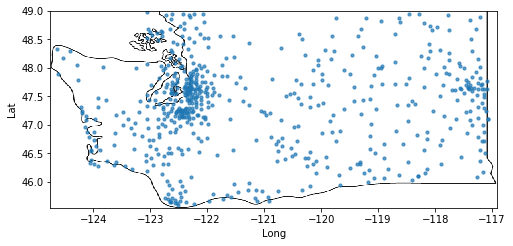

In [307]:
#http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
washington_img=mpimg.imread('washington.gif')
Zipcode_pop_lat_long_df.plot(kind="scatter", x="Long", y="Lat",figsize=(8,7),s=10, alpha=0.7)
plt.imshow(washington_img, extent=[-124.7494, -116.9161 ,45.5437, 49.0049], alpha=0.9)
plt.show()

In [0]:
#https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

Now we had 5 health servise groups with each group having a facility in it.Now lets try to plot that with plt.scatter

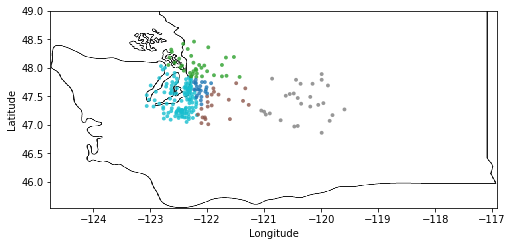

In [309]:
#Visualising the Health servise areas into groups
#http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
import matplotlib.pylab as plt
def plot_clusters(frame):
    city_long_border = (-124.7494, -116.9161)
    city_lat_border = (45.5437, 49.0049)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.Long.values, frame.Lat.values, s=15,lw=0,
               c=frame.Nearby_Facility_ID.values, cmap='tab10', alpha=0.8)
    plt.imshow(washington_img, extent=[-124.7494, -116.9161 ,45.5437, 49.0049], alpha=0.9)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(Zipcode_pop_lat_long_df)

From the above plot we can see that there are five different colours with each colour representing one health servise group areas.<br>
The difference between the above two graphs is that in  the first graph we can see that we plotted all the zipcode areas but in the second plot we only plotted theose areas which were part of health servise groups.
now lets move forword only withose zipcodes which were qualifies to be a part of any of the facility services.


In [0]:
#Now lets remove all those zepcode areas with no nearest facility
Zipcode_pop_lat_long_df=Zipcode_pop_lat_long_df.dropna()

Now lets try to create the Facility Data frame so from the dtat source given in the instructions its contains features like tacility id,and zipcode,primary ,secondary and teritory current capacity 

In [0]:
#creating a new data frame which are in the intsruction.
Facilities_df = {'Nearby_Facility_ID':[1,2,3,4,5],'Facility_AreaZipcode':[98007,98290,98065,98801,98104],'Current_capacity_for_maternity_infacility':[200,36000,12000,0,58000],'Current_Facility_Capacity_Secondary':[44200,0,24336,10150,32700],'Current_Facility_Capacity_Teritary':[0,0,0,22100,8050]}
Facilities_df = pd.DataFrame(Facilities_df) 

In [312]:
Facilities_df

,Nearby_Facility_ID,Facility_AreaZipcode,Current_capacity_for_maternity_infacility,Current_Facility_Capacity_Secondary,Current_Facility_Capacity_Teritary
0,1,98007,200,44200,0
1,2,98290,36000,0,0
2,3,98065,12000,24336,0
3,4,98801,0,10150,22100
4,5,98104,58000,32700,8050


Now lets try to print the final results where every area contains nearest_area_id along with Maternity Population within Area	Maternity percentage,	Elderly Population within Area	Elderly percentage,	Predicted future additional increase decrease maternity population,	Predicted future additional increase decrease elderly population,	Nearby Facility ID,Facility AreaZipcode,	Current capacity for maternity infacility,	Current Facility Capacity Secondary,Current Facility Capacity Teritary

In [313]:
Task1_df= pd.merge(Zipcode_pop_lat_long_df, Facilities_df, how='inner', on = 'Nearby_Facility_ID')
Task1_df.head(10)

,Zipcode,population,Lat,Long,Maternity_Population_within_Area,Maternity_percentage,Elderly_Population_within_Area,Elderly_percentage,Predicted_future_additional_increase_decrease_maternity_population,Predicted_future_additional_increase_decrease_elderly_population,Nearby_Facility_ID,Facility_AreaZipcode,Current_capacity_for_maternity_infacility,Current_Facility_Capacity_Secondary,Current_Facility_Capacity_Teritary
0,98001,31911,47.30,-122.26,2871.99,9,8615.97,27,0,0,5.0,98104,58000,32700,8050
1,98002,31647,47.31,-122.20,2531.76,8,3164.70,10,25,0,5.0,98104,58000,32700,8050
2,98003,44151,47.30,-122.31,3090.57,7,13245.30,30,0,0,5.0,98104,58000,32700,8050
3,98020,18304,47.80,-122.37,1281.28,7,3111.68,17,0,0,5.0,98104,58000,32700,8050
4,98023,47510,47.30,-122.37,4275.90,9,13302.80,28,0,0,5.0,98104,58000,32700,8050
5,98026,35921,47.83,-122.32,1436.84,4,5388.15,15,0,0,5.0,98104,58000,32700,8050
6,98030,33769,47.36,-122.19,3039.21,9,1013.07,3,0,10,5.0,98104,58000,32700,8050
7,98031,36581,47.40,-122.19,2926.48,8,7682.01,21,29,76,5.0,98104,58000,32700,8050
8,98032,33853,47.39,-122.26,1015.59,3,9478.84,28,10,94,5.0,98104,58000,32700,8050
9,98036,36000,47.80,-122.28,1800.00,5,6120.00,17,0,0,5.0,98104,58000,32700,8050


now lets try to print the result Area wise like there are 5 facility health services and now  we try to apply group by operation on our facility id so that we will get the summerized result for each health services

In [314]:
Total_area_count_df= pd.merge(Task1_df.groupby(['Nearby_Facility_ID'])['Maternity_Population_within_Area','Elderly_Population_within_Area','Predicted_future_additional_increase_decrease_maternity_population','Predicted_future_additional_increase_decrease_elderly_population'].sum(), Facilities_df, how='inner', on = 'Nearby_Facility_ID')
Total_area_count_df = Total_area_count_df.drop(columns="Facility_AreaZipcode")
Total_area_count_df.columns = ['Facility\nId', 'Total\nMaternity\nPopulation\nwithin\nArea','Total\nElderly\nPopulation\nwithin\nArea','Predicted\nfuture\nadditional\nincrease\ndecrease\nmaternity\npopulation','Predicted\nfuture\nadditional\nincrease_decrease\nelderly\npopulation','Current\ncapacity\nfor\nmaternity\ninfacility','Current\nFacility\nCapacity\nSecondary','Current\nFacility\nCapacity\nTeritary']
Total_area_count_df

,Facility Id,Total Maternity Population within Area,Total Elderly Population within Area,Predicted future additional increase decrease maternity population,Predicted future additional increase_decrease elderly population,Current capacity for maternity infacility,Current Facility Capacity Secondary,Current Facility Capacity Teritary
0,1.0,41451.15,114524.13,230,548,200,44200,0
1,2.0,43554.77,100299.47,192,348,36000,0,0
2,3.0,16234.92,51454.48,27,302,12000,24336,0
3,4.0,12567.57,23716.99,82,94,0,10150,22100
4,5.0,127750.99,347221.15,472,1568,58000,32700,8050


###Conclusions & observations:



1.   Our primary motive is to group areas into health services
2.   And we have 5 facilities now we need to group facility areas and nearby areas into health services.
3.   Coming to the data sources we already have our 5 facilities and we got the most sutable data sets mentioned in the asumptions section
4.   Coming to the crux of the problem we need to group nearby areas for that we made use of the concept of latitude and longitude.
5.   So we will put all those zipcode areas which could be reachable within an hour(or)are in distance less than 40 miles from the facility into its bucket.
6.   If a zipcode area is close to more than one facility area we will break the tick by picking the shortest distance.
7.   For predicting futhuere maternity and elderly rates i made an other assumption taht on average there is 0.7% increase in every year
8.   which means my simple base line model will predict the futhure that is 2011 maternity and elderly increase rates
9.  Finally with few assumptions we came to the desired solution

